# By Sayan Banerjee

### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
import time

### Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
data=heart_data['target'].value_counts()
data

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

### Exploratory Data Analysis (EDA)

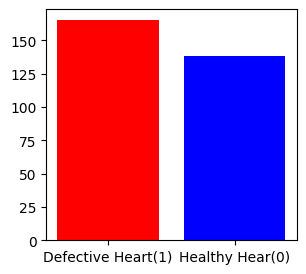

In [10]:
#exploring target values
name= ['Defective Heart(1)','Healthy Hear(0)' ]
values=[165, 138]
plt.figure(figsize=(11,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(name, values, color=color)
plt.show()

In [11]:
#Analysing sex feature
data1=heart_data.groupby('sex')
chart=data1['age'].count()
print(chart)


sex
0     96
1    207
Name: age, dtype: int64


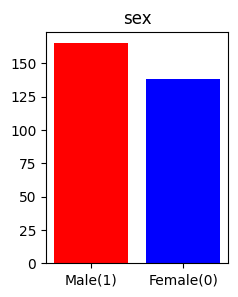

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [12]:
name= ['Male(1)','Female(0)' ]
values=[165, 138]
plt.figure(figsize=(8,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(name, values, color=color)
plt.title('sex')
plt.show()
heart_data['sex'].describe()

In [13]:
#Analysing Chest Pain feature
data1=heart_data.groupby('cp')
chart=data1['age'].count()
print(chart)


cp
0    143
1     50
2     87
3     23
Name: age, dtype: int64


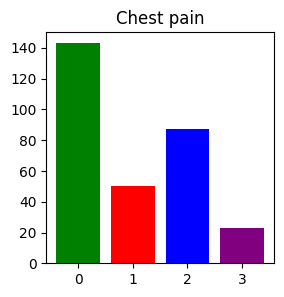

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [14]:
name= ['0','1','2','3' ]
values=[143,50.,87,23]
color = ["green","red","blue","purple"]
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.bar(name, values, color=color)
plt.title('Chest pain')
plt.show()
heart_data['cp'].describe()

In [15]:
#Analysing Fasting blood sugar feature
data1=heart_data.groupby('fbs')
chart=data1['age'].count()
print(chart)


fbs
0    258
1     45
Name: age, dtype: int64


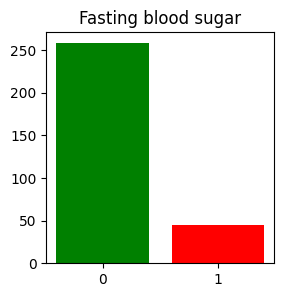

In [16]:
%matplotlib inline
name= ['0','1' ]
values=[258, 45]
color = ["green","red"]
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.bar(name, values, color=color)
plt.title("Fasting blood sugar")
plt.show()

In [17]:
#Analysing Maximum heart rate achieved  feature
data1=heart_data.groupby('thalach')
chart=data1['age'].count()
df=pd.DataFrame(chart)
chart


thalach
71     1
88     1
90     1
95     1
96     2
      ..
190    1
192    1
194    1
195    1
202    1
Name: age, Length: 91, dtype: int64

In [18]:
#Analysing Exercise-induced angina feature
data1=heart_data.groupby('exang')
chart=data1['age'].count()
df=pd.DataFrame(chart)
chart

exang
0    204
1     99
Name: age, dtype: int64

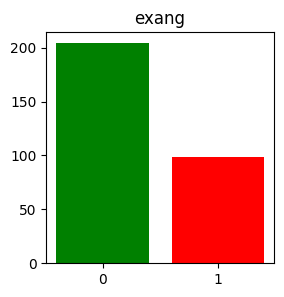

In [19]:
name= ['0','1' ]
values=[204, 99]
color = ["green","red"]
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.bar(name, values, color=color)
plt.title("exang")
plt.show()

In [20]:
#Analysing thalssemia feature
data1=heart_data.groupby('thal')
chart=data1['age'].count()
df=pd.DataFrame(chart)
chart

thal
0      2
1     18
2    166
3    117
Name: age, dtype: int64

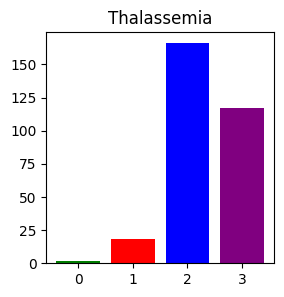

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

In [21]:
name= ['0','1','2','3' ]
values=[2,18,166,117]
color = ["green","red","blue","purple"]
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.bar(name, values, color=color)
plt.title('Thalassemia')
plt.show()
heart_data['thal'].describe()

### Splitting the Features and Target

In [22]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [23]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [24]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# Model Training

## Logistic Regression

In [27]:
model_logistic = LogisticRegression()
start_time = time.time()  # Start the timer
# training the LogisticRegression model with Training data
model_logistic.fit(X_train, Y_train)
end_time = time.time()  # Stop the timer
lr_time = round(end_time - start_time, 4)
lr_time

c:\Users\SAYAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0288

In [28]:
# accuracy on training data
X_train_prediction = model_logistic.predict(X_train)
training_data_accuracy_logistic = accuracy_score(X_train_prediction, Y_train)


In [29]:
print('Accuracy on Training data : ', training_data_accuracy_logistic)

Accuracy on Training data :  0.8512396694214877


In [30]:
# accuracy on test data
X_test_prediction = model_logistic.predict(X_test)
test_data_accuracy_logistic = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy on Test data : ', test_data_accuracy_logistic)

Accuracy on Test data :  0.819672131147541


<BarContainer object of 2 artists>

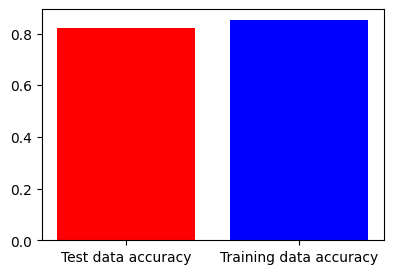

In [32]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_logistic, training_data_accuracy_logistic]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [33]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,23,5
Actual Positive,6,27


In [34]:
# save confusion matrix and slice into four pieces
TP_lr = cm[1][1]
TN_lr = cm[0][0]
FP_lr = cm[0][1]
FN_lr = cm[1][0]
print('True Positives:', TP_lr)
print('True Negatives:', TN_lr)
print('False Positives:', FP_lr)
print('False Negatives:', FN_lr) 

True Positives: 27
True Negatives: 23
False Positives: 5
False Negatives: 6


In [35]:
# calculate the sensitivity
conf_sensitivity_lr = (TP_lr / float(TP_lr + FN_lr))

In [36]:
# calculate the specificity
conf_specificity_lr = (TN_lr / float(TN_lr + FP_lr))

In [37]:
# calculate precision
conf_precision_lr = (TN_lr / float(TN_lr + FP_lr))

In [38]:
# calculate f_1 score
conf_f1_lr = 2 * ((conf_precision_lr * conf_sensitivity_lr) / (conf_precision_lr + conf_sensitivity_lr))

In [39]:
print(f'Sensitivity: {conf_sensitivity_lr}') 
print(f'Specificity: {conf_specificity_lr}') 
print(f'Precision: {conf_precision_lr}')
print(f'f_1 Score: {conf_f1_lr}')

Sensitivity: 0.8181818181818182
Specificity: 0.8214285714285714
Precision: 0.8214285714285714
f_1 Score: 0.8198019801980199


## XG Boost

In [40]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
start_time = time.time()  # Start the timer
#training the xgb model with the train data
xgb_model.fit(X_train, Y_train)
end_time = time.time()  # Stop the timer
xgb_time = round(end_time - start_time, 4)
xgb_time

0.1071

In [41]:
# accuracy on train data 
X_train_prediction_xgb = xgb_model.predict(X_train)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, Y_train)

In [42]:
print('Accuracy on Training data : ', training_data_accuracy_xgb)

Accuracy on Training data :  1.0


In [43]:
#accuracy on train data
X_test_prediction_xgb = xgb_model.predict(X_test)
test_data_accuracy_xgb = accuracy_score(X_test_prediction_xgb, Y_test)

In [44]:
print('Accuracy on Test data : ', test_data_accuracy_xgb)

Accuracy on Test data :  0.7704918032786885


<BarContainer object of 2 artists>

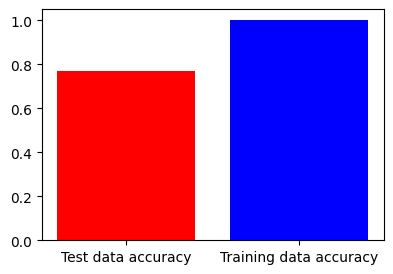

In [45]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_xgb, training_data_accuracy_xgb]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [46]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_xgb)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,21,7
Actual Positive,7,26


In [47]:
# save confusion matrix and slice into four pieces
TP_xgb = cm[1][1]
TN_xgb = cm[0][0]
FP_xgb = cm[0][1]
FN_xgb = cm[1][0]
print('True Positives:', TP_xgb)
print('True Negatives:', TN_xgb)
print('False Positives:', FP_xgb)
print('False Negatives:', FN_xgb) 

True Positives: 26
True Negatives: 21
False Positives: 7
False Negatives: 7


In [48]:
# calculate the sensitivity
conf_sensitivity_xgb = (TP_xgb / float(TP_xgb + FN_xgb))

In [49]:
# calculate the specificity
conf_specificity_xgb = (TN_xgb / float(TN_xgb + FP_xgb))

In [50]:
# calculate precision
conf_precision_xgb = (TN_xgb / float(TN_xgb + FP_xgb))

In [51]:
# calculate f_1 score
conf_f1_xgb = 2 * ((conf_precision_xgb * conf_sensitivity_xgb) / (conf_precision_xgb + conf_sensitivity_xgb))

In [52]:
print(f'Sensitivity: {conf_sensitivity_xgb}') 
print(f'Specificity: {conf_specificity_xgb}') 
print(f'Precision: {conf_precision_xgb}')
print(f'f_1 Score: {conf_f1_xgb}')

Sensitivity: 0.7878787878787878
Specificity: 0.75
Precision: 0.75
f_1 Score: 0.7684729064039408


## SVM

In [53]:
svm_model = svm.SVC(kernel='linear')
start_time = time.time()  # Start the timer
#training svm model with train data
svm_model.fit(X_train, Y_train)
end_time = time.time()  # stop the timer
svm_time = round(end_time - start_time, 4)
svm_time

0.3559

In [54]:
#accuracy on train data
X_train_prediction_svm = svm_model.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)

In [55]:
print('Accuracy on Training data : ', training_data_accuracy_svm)

Accuracy on Training data :  0.8553719008264463


In [56]:
#accuracy on test data
X_test_prediction_svm = svm_model.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_test_prediction_svm, Y_test)

In [57]:
print('Accuracy on Test data : ', test_data_accuracy_svm)

Accuracy on Test data :  0.819672131147541


<BarContainer object of 2 artists>

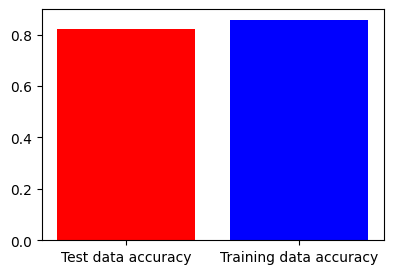

In [58]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_svm, training_data_accuracy_svm]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [59]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_svm)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,21,7
Actual Positive,4,29


In [60]:
# save confusion matrix and slice into four pieces
TP_svm = cm[1][1]
TN_svm = cm[0][0]
FP_svm = cm[0][1]
FN_svm = cm[1][0]
print('True Positives:', TP_svm)
print('True Negatives:', TN_svm)
print('False Positives:', FP_svm)
print('False Negatives:', FN_svm) 

True Positives: 29
True Negatives: 21
False Positives: 7
False Negatives: 4


In [61]:
# calculate the sensitivity
conf_sensitivity_svm = (TP_svm / float(TP_svm + FN_svm))

In [62]:
# calculate the specificity
conf_specificity_svm = (TN_svm / float(TN_svm + FP_svm))

In [63]:
# calculate precision
conf_precision_svm = (TN_svm / float(TN_svm + FP_svm))

In [64]:
# calculate f_1 score
conf_f1_svm = 2 * ((conf_precision_svm * conf_sensitivity_svm) / (conf_precision_svm + conf_sensitivity_svm))

In [65]:
print(f'Sensitivity: {conf_sensitivity_svm}') 
print(f'Specificity: {conf_specificity_svm}') 
print(f'Precision: {conf_precision_svm}')
print(f'f_1 Score: {conf_f1_svm}')

Sensitivity: 0.8787878787878788
Specificity: 0.75
Precision: 0.75
f_1 Score: 0.8093023255813953


## KN Neighbors

In [66]:
knn_model=KNeighborsClassifier(n_neighbors=7)
start_time = time.time()  # Start the timer
#train the kn neighbors model with train data
knn_model.fit(X_train, Y_train)
end_time = time.time()  # stop the timer
knn_time = round(end_time - start_time, 4)
knn_time

0.007

In [67]:
#accuracy on train data
X_train_prediction_knn = knn_model.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)

In [68]:
print('Accuracy on Training data : ', training_data_accuracy_knn)

Accuracy on Training data :  0.7603305785123967


In [69]:
#accuracy on test data
X_test_prediction_knn = knn_model.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)

In [70]:
print('Accuracy on Test data : ', test_data_accuracy_knn)

Accuracy on Test data :  0.6065573770491803


<BarContainer object of 2 artists>

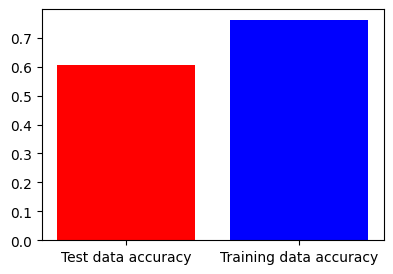

In [71]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_knn, training_data_accuracy_knn]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [72]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_knn)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,14,14
Actual Positive,10,23


In [73]:
# save confusion matrix and slice into four pieces
TP_knn = cm[1][1]
TN_knn = cm[0][0]
FP_knn = cm[0][1]
FN_knn = cm[1][0]
print('True Positives:', TP_knn)
print('True Negatives:', TN_knn)
print('False Positives:', FP_knn)
print('False Negatives:', FN_knn) 

True Positives: 23
True Negatives: 14
False Positives: 14
False Negatives: 10


In [74]:
# calculate the sensitivity
conf_sensitivity_knn = (TP_knn / float(TP_knn + FN_knn))

In [75]:
# calculate the specificity
conf_specificity_knn = (TN_knn / float(TN_knn + FP_knn))

In [76]:
# calculate precision
conf_precision_knn = (TN_knn / float(TN_knn + FP_knn))

In [77]:
# calculate f_1 score
conf_f1_knn = 2 * ((conf_precision_knn * conf_sensitivity_knn) / (conf_precision_knn + conf_sensitivity_knn))

In [78]:
print(f'Sensitivity: {conf_sensitivity_knn}') 
print(f'Specificity: {conf_specificity_knn}') 
print(f'Precision: {conf_precision_knn}')
print(f'f_1 Score: {conf_f1_knn}')

Sensitivity: 0.696969696969697
Specificity: 0.5
Precision: 0.5
f_1 Score: 0.5822784810126582


## Decision Tree

In [79]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [80]:
dt_model=DecisionTreeClassifier(random_state=best_x)
start_time = time.time()  # Start the timer
#train the decision tree with trin data
dt_model.fit(X_train, Y_train)
end_time = time.time()  # stop the timer
dt_time = round(end_time - start_time, 4)
dt_time

0.0042

In [81]:
# accuracy on train data
X_train_prediction_dt = dt_model.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)

In [82]:
print('Accuracy on Training data : ', training_data_accuracy_dt)

Accuracy on Training data :  1.0


In [83]:
#accuracy on test data
X_test_prediction_dt= dt_model.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)

In [84]:
print('Accuracy on Test data : ', test_data_accuracy_dt)

Accuracy on Test data :  0.8360655737704918


<BarContainer object of 2 artists>

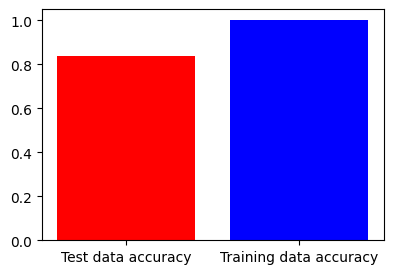

In [85]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_dt, training_data_accuracy_dt]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values,color=color)

In [86]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_dt)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,22,6
Actual Positive,4,29


In [87]:
# save confusion matrix and slice into four pieces
TP_dt = cm[1][1]
TN_dt = cm[0][0]
FP_dt = cm[0][1]
FN_dt = cm[1][0]
print('True Positives:', TP_dt)
print('True Negatives:', TN_dt)
print('False Positives:', FP_dt)
print('False Negatives:', FN_dt) 

True Positives: 29
True Negatives: 22
False Positives: 6
False Negatives: 4


In [88]:
# calculate the sensitivity
conf_sensitivity_dt = (TP_dt / float(TP_dt + FN_dt))

In [89]:
# calculate the specificity
conf_specificity_dt = (TN_dt / float(TN_dt + FP_dt))

In [90]:
# calculate precision
conf_precision_dt = (TN_dt / float(TN_dt + FP_dt))

In [91]:
# calculate f_1 score
conf_f1_dt = 2 * ((conf_precision_dt * conf_sensitivity_dt) / (conf_precision_dt + conf_sensitivity_dt))

In [92]:
print(f'Sensitivity: {conf_sensitivity_dt}') 
print(f'Specificity: {conf_specificity_dt}') 
print(f'Precision: {conf_precision_dt}')
print(f'f_1 Score: {conf_f1_dt}')

Sensitivity: 0.8787878787878788
Specificity: 0.7857142857142857
Precision: 0.7857142857142857
f_1 Score: 0.8296488946684005


## Neural Network

In [93]:
nn_model = Sequential()
nn_model.add(Dense(11,activation='relu',input_dim=13))
nn_model.add(Dense(1,activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()  # Start the timer
#train neural network model with train data
nn_model.fit(X_train,Y_train,epochs=10)
end_time = time.time()  # stop the timer
nn_time = round(end_time - start_time, 4)
nn_time

Epoch 1/10
8/8 [==============================] - 2s 4ms/step - loss: 4.0452 - accuracy: 0.5165
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 2.9571 - accuracy: 0.4339
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 2.4480 - accuracy: 0.4545
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 1.9633 - accuracy: 0.4711
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 1.5713 - accuracy: 0.4917
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 1.3063 - accuracy: 0.5661
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 1.0890 - accuracy: 0.5992
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9057 - accuracy: 0.6446
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.8206 - accuracy: 0.6612
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.6612


2.3559

In [94]:
X_train_prediction_nn = nn_model.predict(X_train)
rounded = [round(x[0]) for x in X_train_prediction_nn ]

X_train_prediction_nn  = rounded


8/8 [==============================] - 0s 3ms/step


In [95]:
#accuracy on train data
training_data_accuracy_nn= (accuracy_score(X_train_prediction_nn, Y_train))

In [96]:
print('Accuracy on Training data : ', training_data_accuracy_nn)

Accuracy on Training data :  0.6611570247933884


In [97]:
X_test_prediction_nn = nn_model.predict(X_test)
rounded = [round(x[0]) for x in X_test_prediction_nn ]

X_test_prediction_nn  = rounded

2/2 [==============================] - 0s 4ms/step


In [98]:
# accuracy on test data
test_data_accuracy_nn= (accuracy_score(X_test_prediction_nn, Y_test))

In [99]:
print('Accuracy on Test data : ', test_data_accuracy_dt)

Accuracy on Test data :  0.8360655737704918


<BarContainer object of 2 artists>

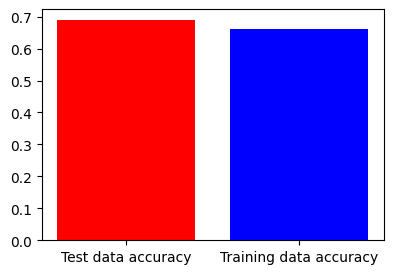

In [100]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_nn, training_data_accuracy_nn]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [101]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_nn)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,18,10
Actual Positive,9,24


In [102]:
# save confusion matrix and slice into four pieces
TP_nn = cm[1][1]
TN_nn = cm[0][0]
FP_nn = cm[0][1]
FN_nn = cm[1][0]
print('True Positives:', TP_nn)
print('True Negatives:', TN_nn)
print('False Positives:', FP_nn)
print('False Negatives:', FN_nn)

True Positives: 24
True Negatives: 18
False Positives: 10
False Negatives: 9


In [103]:
# calculate the sensitivity
conf_sensitivity_nn = (TP_nn / float(TP_nn + FN_nn))

In [104]:
# calculate the specificity
conf_specificity_nn = (TN_nn / float(TN_nn + FP_nn))

In [105]:
# calculate precision
conf_precision_nn = (TN_nn / float(TN_nn + FP_nn))

In [106]:
# calculate f_1 score
conf_f1_nn = 2 * ((conf_precision_nn * conf_sensitivity_nn) / (conf_precision_nn + conf_sensitivity_nn))

In [107]:
print(f'Sensitivity: {conf_sensitivity_nn}') 
print(f'Specificity: {conf_specificity_nn}') 
print(f'Precision: {conf_precision_nn}')
print(f'f_1 Score: {conf_f1_nn}')

Sensitivity: 0.7272727272727273
Specificity: 0.6428571428571429
Precision: 0.6428571428571429
f_1 Score: 0.6824644549763033


## Random Forest

In [108]:
max_accuracy = 0
for x in range(200):
    rf_model = RandomForestClassifier(random_state=x)
    rf_model.fit(X_train,Y_train)
    X_train_prediction_rf = rf_model.predict(X_train)
    current_accuracy = round(accuracy_score(X_train_prediction_rf,Y_train)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rf_model = RandomForestClassifier(random_state=best_x)



In [109]:
start_time = time.time()  # Start the timer
#train the random forest with train data
rf_model.fit(X_train,Y_train)
end_time = time.time()  # stop the timer
rf_time = round(end_time - start_time, 4)
rf_time

0.2046

In [110]:
X_train_prediction_rf= rf_model.predict(X_train)

In [111]:
#accuracy on train data
training_data_accuracy_rf= (accuracy_score(X_train_prediction_rf,Y_train))

In [112]:
print('Accuracy on Training data : ', training_data_accuracy_rf)

Accuracy on Training data :  1.0


In [113]:
X_test_prediction_rf= rf_model.predict(X_test)

In [114]:
# accuracy on test data
test_data_accuracy_rf= (accuracy_score(X_test_prediction_rf,Y_test))

In [115]:
print('Accuracy on Test data : ', test_data_accuracy_rf)

Accuracy on Test data :  0.7868852459016393


<BarContainer object of 2 artists>

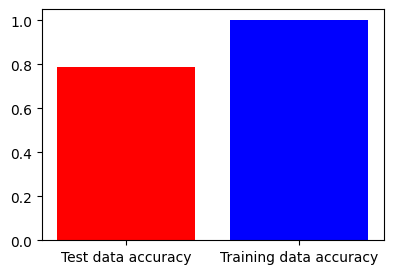

In [116]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_rf, training_data_accuracy_rf]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [117]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_rf)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,22,6
Actual Positive,7,26


In [118]:
# save confusion matrix and slice into four pieces
TP_rf = cm[1][1]
TN_rf = cm[0][0]
FP_rf = cm[0][1]
FN_rf = cm[1][0]
print('True Positives:', TP_rf)
print('True Negatives:', TN_rf)
print('False Positives:', FP_rf)
print('False Negatives:', FN_rf)

True Positives: 26
True Negatives: 22
False Positives: 6
False Negatives: 7


In [119]:
# calculate the sensitivity
conf_sensitivity_rf = (TP_rf / float(TP_rf + FN_rf))

In [120]:
# calculate the specificity
conf_specificity_rf = (TN_rf / float(TN_rf + FP_rf))

In [121]:
# calculate precision
conf_precision_rf = (TN_rf / float(TN_rf + FP_rf))

In [122]:
# calculate f_1 score
conf_f1_rf = 2 * ((conf_precision_rf * conf_sensitivity_rf) / (conf_precision_rf + conf_sensitivity_rf))

In [123]:
print(f'Sensitivity: {conf_sensitivity_rf}') 
print(f'Specificity: {conf_specificity_rf}') 
print(f'Precision: {conf_precision_rf}')
print(f'f_1 Score: {conf_f1_rf}')

Sensitivity: 0.7878787878787878
Specificity: 0.7857142857142857
Precision: 0.7857142857142857
f_1 Score: 0.7867950481430535


## Naive Bayes

In [124]:
nb_model=GaussianNB()

In [125]:
start_time = time.time()  # Start the timer
# tain naive bayes model with train data
nb_model.fit(X_train, Y_train)
end_time = time.time()  # stop the timer
nb_time = round(end_time - start_time, 4)
nb_time

0.0035

In [126]:
X_train_prediction_nb = nb_model.predict(X_train)
X_test_prediction_nb = nb_model.predict(X_test)

In [127]:
#accuracy on tain and test data
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb, Y_train)
test_data_accuracy_nb = accuracy_score(X_test_prediction_nb, Y_test)

In [128]:
print('Accuracy on Training data : ', training_data_accuracy_nb)
print('Accuracy on Test data : ', test_data_accuracy_nb)

Accuracy on Training data :  0.8471074380165289
Accuracy on Test data :  0.819672131147541


<BarContainer object of 2 artists>

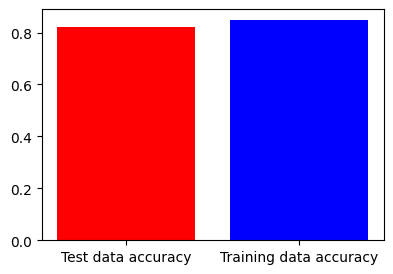

In [129]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_nb, training_data_accuracy_nb]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [130]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_nb)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,25,3
Actual Positive,8,25


In [131]:
# save confusion matrix and slice into four pieces
TP_nb = cm[1][1]
TN_nb = cm[0][0]
FP_nb = cm[0][1]
FN_nb = cm[1][0]
print('True Positives:', TP_nb)
print('True Negatives:', TN_nb)
print('False Positives:', FP_nb)
print('False Negatives:', FN_nb)

True Positives: 25
True Negatives: 25
False Positives: 3
False Negatives: 8


In [132]:
# calculate the sensitivity
conf_sensitivity_nb = (TP_nb / float(TP_nb + FN_nb))

In [133]:
# calculate the specificity
conf_specificity_nb = (TN_nb / float(TN_nb + FP_nb))

In [134]:
# calculate precision
conf_precision_nb = (TN_nb / float(TN_nb + FP_nb))

In [135]:
# calculate f_1 score
conf_f1_nb = 2 * ((conf_precision_nb * conf_sensitivity_nb) / (conf_precision_nb + conf_sensitivity_nb))

In [136]:
print(f'Sensitivity: {conf_sensitivity_nb}') 
print(f'Specificity: {conf_specificity_nb}') 
print(f'Precision: {conf_precision_nb}')
print(f'f_1 Score: {conf_f1_nb}')

Sensitivity: 0.7575757575757576
Specificity: 0.8928571428571429
Precision: 0.8928571428571429
f_1 Score: 0.819672131147541


## Cat Boost

In [137]:
# train the cat boost model with train data
params = {'learning_rate': 0.1, 'depth': 6,\
          'l2_leaf_reg': 3, 'iterations': 10}
cb_model = CatBoostClassifier()
start_time = time.time()  # Start the timer
cb_model.fit(X_train,Y_train)
end_time = time.time()  # stop the timer
cb_time = round(end_time - start_time, 4)
cb_time


Learning rate set to 0.005621
0:	learn: 0.6872473	total: 148ms	remaining: 2m 27s
1:	learn: 0.6817293	total: 152ms	remaining: 1m 15s
2:	learn: 0.6762667	total: 154ms	remaining: 51.1s
3:	learn: 0.6708223	total: 156ms	remaining: 38.8s
4:	learn: 0.6656280	total: 159ms	remaining: 31.6s
5:	learn: 0.6611711	total: 160ms	remaining: 26.6s
6:	learn: 0.6573520	total: 162ms	remaining: 23s
7:	learn: 0.6525319	total: 165ms	remaining: 20.5s
8:	learn: 0.6476904	total: 168ms	remaining: 18.5s
9:	learn: 0.6423973	total: 170ms	remaining: 16.9s
10:	learn: 0.6379099	total: 172ms	remaining: 15.5s
11:	learn: 0.6332676	total: 174ms	remaining: 14.3s
12:	learn: 0.6284577	total: 176ms	remaining: 13.3s
13:	learn: 0.6241655	total: 178ms	remaining: 12.5s
14:	learn: 0.6196321	total: 180ms	remaining: 11.8s
15:	learn: 0.6146231	total: 182ms	remaining: 11.2s
16:	learn: 0.6115128	total: 184ms	remaining: 10.6s
17:	learn: 0.6075234	total: 186ms	remaining: 10.1s
18:	learn: 0.6035931	total: 188ms	remaining: 9.7s
19:	learn: 0

450:	learn: 0.1784229	total: 1.28s	remaining: 1.56s
451:	learn: 0.1782430	total: 1.28s	remaining: 1.56s
452:	learn: 0.1778569	total: 1.29s	remaining: 1.55s
453:	learn: 0.1774725	total: 1.29s	remaining: 1.55s
454:	learn: 0.1773270	total: 1.29s	remaining: 1.55s
455:	learn: 0.1771733	total: 1.29s	remaining: 1.54s
456:	learn: 0.1769595	total: 1.3s	remaining: 1.54s
457:	learn: 0.1768033	total: 1.3s	remaining: 1.54s
458:	learn: 0.1764196	total: 1.3s	remaining: 1.53s
459:	learn: 0.1759810	total: 1.3s	remaining: 1.53s
460:	learn: 0.1755733	total: 1.31s	remaining: 1.53s
461:	learn: 0.1752786	total: 1.31s	remaining: 1.53s
462:	learn: 0.1750491	total: 1.31s	remaining: 1.52s
463:	learn: 0.1748284	total: 1.31s	remaining: 1.52s
464:	learn: 0.1746298	total: 1.32s	remaining: 1.51s
465:	learn: 0.1743230	total: 1.32s	remaining: 1.51s
466:	learn: 0.1741052	total: 1.32s	remaining: 1.51s
467:	learn: 0.1739781	total: 1.32s	remaining: 1.5s
468:	learn: 0.1737034	total: 1.33s	remaining: 1.5s
469:	learn: 0.1733

2.5673

In [138]:
X_train_prediction_cb = cb_model.predict(X_train)
X_test_prediction_cb = cb_model.predict(X_test)

In [139]:
#accuracy on train data and test data
training_data_accuracy_cb = accuracy_score(X_train_prediction_cb, Y_train)
test_data_accuracy_cb = accuracy_score(X_test_prediction_cb, Y_test)

In [140]:
print('Accuracy on Training data : ', training_data_accuracy_cb)
print('Accuracy on Test data : ', test_data_accuracy_cb)

Accuracy on Training data :  0.9958677685950413
Accuracy on Test data :  0.7704918032786885


<BarContainer object of 2 artists>

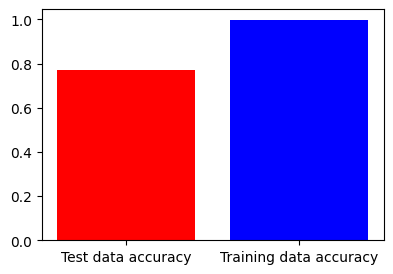

In [141]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_cb, training_data_accuracy_cb]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [142]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_cb)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,21,7
Actual Positive,7,26


In [143]:
# save confusion matrix and slice into four pieces
TP_cb = cm[1][1]
TN_cb = cm[0][0]
FP_cb = cm[0][1]
FN_cb = cm[1][0]
print('True Positives:', TP_cb)
print('True Negatives:', TN_cb)
print('False Positives:', FP_cb)
print('False Negatives:', FN_cb)

True Positives: 26
True Negatives: 21
False Positives: 7
False Negatives: 7


In [144]:
# calculate the sensitivity
conf_sensitivity_cb = (TP_cb / float(TP_cb + FN_cb))

In [145]:
# calculate the specificity
conf_specificity_cb = (TN_cb / float(TN_cb + FP_cb))

In [146]:
# calculate precision
conf_precision_cb = (TN_cb / float(TN_cb + FP_cb))

In [147]:
# calculate f_1 score
conf_f1_cb = 2 * ((conf_precision_cb * conf_sensitivity_cb) / (conf_precision_cb + conf_sensitivity_cb))

In [148]:
print(f'Sensitivity: {conf_sensitivity_cb}') 
print(f'Specificity: {conf_specificity_cb}') 
print(f'Precision: {conf_precision_cb}')
print(f'f_1 Score: {conf_f1_cb}')

Sensitivity: 0.7878787878787878
Specificity: 0.75
Precision: 0.75
f_1 Score: 0.7684729064039408


## Ada Boost

In [149]:
#train ada boost model with tain data
ab_model = AdaBoostClassifier()
start_time = time.time()  # Start the timer
ab_model.fit(X_train,Y_train)
end_time = time.time()  # stop the timer
ab_time = round(end_time - start_time, 4)
ab_time


0.1325

In [150]:
X_train_prediction_ab = ab_model.predict(X_train)
X_test_prediction_ab = ab_model.predict(X_test)

In [151]:
# accuracy on train data and test data
training_data_accuracy_ab = accuracy_score(X_train_prediction_ab, Y_train)
test_data_accuracy_ab = accuracy_score(X_test_prediction_ab, Y_test)

In [152]:
print('Accuracy on Training data : ', training_data_accuracy_ab)
print('Accuracy on Test data : ', test_data_accuracy_ab)

Accuracy on Training data :  0.9256198347107438
Accuracy on Test data :  0.7704918032786885


<BarContainer object of 2 artists>

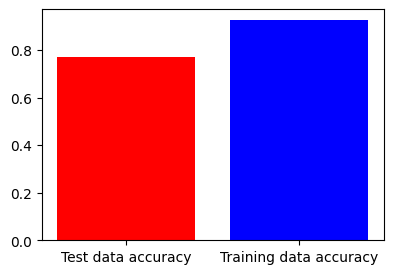

In [153]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_ab, training_data_accuracy_ab]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values,color=color)

In [154]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_ab)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,23,5
Actual Positive,9,24


In [155]:
# save confusion matrix and slice into four pieces
TP_ab = cm[1][1]
TN_ab = cm[0][0]
FP_ab = cm[0][1]
FN_ab = cm[1][0]
print('True Positives:', TP_ab)
print('True Negatives:', TN_ab)
print('False Positives:', FP_ab)
print('False Negatives:', FN_ab)

True Positives: 24
True Negatives: 23
False Positives: 5
False Negatives: 9


In [156]:
# calculate the sensitivity
conf_sensitivity_ab = (TP_ab / float(TP_ab + FN_ab))

In [157]:
# calculate the specificity
conf_specificity_ab = (TN_ab / float(TN_ab + FP_ab))

In [158]:
# calculate precision
conf_precision_ab = (TN_ab / float(TN_ab + FP_ab))

In [159]:
# calculate f_1 score
conf_f1_ab = 2 * ((conf_precision_ab * conf_sensitivity_ab) / (conf_precision_ab + conf_sensitivity_ab))

In [160]:
print(f'Sensitivity: {conf_sensitivity_ab}') 
print(f'Specificity: {conf_specificity_ab}') 
print(f'Precision: {conf_precision_ab}')
print(f'f_1 Score: {conf_f1_ab}')

Sensitivity: 0.7272727272727273
Specificity: 0.8214285714285714
Precision: 0.8214285714285714
f_1 Score: 0.7714884696016772


## Ridge Regression

In [161]:
#train ridge regression model with train data
rr_model = Ridge(alpha = 0.5, tol = 0.001, \
              solver ='auto', random_state = 42)
start_time = time.time()  # Start the timer
rr_model.fit(X_train,Y_train)
end_time = time.time()  # stop the timer
rr_time = round(end_time - start_time, 4)
rr_time


0.008

In [162]:
X_train_prediction_rr = rr_model.predict(X_train)
X_test_prediction_rr = rr_model.predict(X_test)


In [163]:
#accuracy on train and test data
training_data_accuracy_rr = rr_model.score(X_train, Y_train)
test_data_accuracy_rr = rr_model.score(X_test, Y_test)

In [164]:
print('Accuracy on Training data : ', training_data_accuracy_rr)
print('Accuracy on Test data : ', test_data_accuracy_rr)

Accuracy on Training data :  0.5373435825401789
Accuracy on Test data :  0.41912175285734443


<BarContainer object of 2 artists>

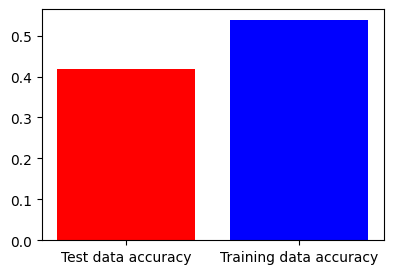

In [165]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_rr, training_data_accuracy_rr]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [166]:
###### Creating the confusion matrix
threshold = 0.5
y_pred_class = [1 if prob >= threshold else 0 for prob in X_test_prediction_rr]

# Create a confusion matrix
cm = metrics.confusion_matrix(Y_test, y_pred_class)

In [167]:
###### save confusion matrix and slice into four pieces
TP_rr = cm[1][1]
TN_rr = cm[0][0]
FP_rr = cm[0][1]
FN_rr = cm[1][0]
print('True Positives:', TP_rr)
print('True Negatives:', TN_rr)
print('False Positives:', FP_rr)
print('False Negatives:', FN_rr)

True Positives: 29
True Negatives: 21
False Positives: 7
False Negatives: 4


In [168]:
###### calculate the sensitivity
conf_sensitivity_rr = (TP_rr / float(TP_rr + FN_rr))

In [169]:
###### calculate the specificity
conf_specificity_rr = (TN_rr / float(TN_rr + FP_rr))

In [170]:
###### calculate precision
conf_precision_rr = (TN_rr / float(TN_rr + FP_rr))

In [171]:
###### calculate f_1 score
conf_f1_rr = 2 * ((conf_precision_rr * conf_sensitivity_rr) / (conf_precision_rr + conf_sensitivity_rr))

In [172]:
###### print(f'Sensitivity: {conf_sensitivity_rr}') 
print(f'Specificity: {conf_specificity_rr}') 
print(f'Precision: {conf_precision_rr}')
print(f'f_1 Score: {conf_f1_rr}')

Specificity: 0.75
Precision: 0.75
f_1 Score: 0.8093023255813953


## MultinomialNB

In [173]:
mnb_model=MultinomialNB()

In [174]:
#traih multinomialnb model with train data
start_time = time.time()  # Start the timer
mnb_model.fit(X_train,Y_train)
end_time = time.time()  # stop the timer
mnb_time = round(end_time - start_time, 4)
mnb_time


0.0

In [175]:
X_train_prediction_mnb = mnb_model.predict(X_train)
X_test_prediction_mnb = mnb_model.predict(X_test)

In [176]:
#accuracy on train and test data
training_data_accuracy_mnb = accuracy_score(X_train_prediction_mnb, Y_train)
test_data_accuracy_mnb = accuracy_score(X_test_prediction_mnb, Y_test)

In [177]:
print('Accuracy on Training data : ', training_data_accuracy_mnb)
print('Accuracy on Test data : ', test_data_accuracy_mnb)

Accuracy on Training data :  0.7603305785123967
Accuracy on Test data :  0.6885245901639344


<BarContainer object of 2 artists>

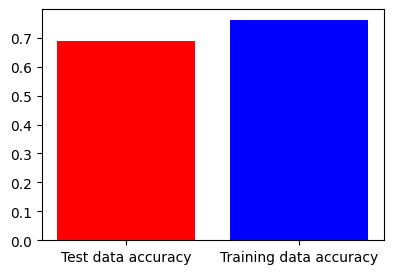

In [178]:
#accuracy difference between test data and train data
names = ['Test data accuracy', 'Training data accuracy']
values = [test_data_accuracy_mnb, training_data_accuracy_mnb]

plt.figure(figsize=(15,3))
color=['red', 'blue']
plt.subplot(131)
plt.bar(names, values, color=color)

In [179]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test,X_test_prediction_mnb)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,21,7
Actual Positive,12,21


In [180]:
# save confusion matrix and slice into four pieces
TP_mnb = cm[1][1]
TN_mnb = cm[0][0]
FP_mnb = cm[0][1]
FN_mnb = cm[1][0]
print('True Positives:', TP_mnb)
print('True Negatives:', TN_mnb)
print('False Positives:', FP_mnb)
print('False Negatives:', FN_mnb)

True Positives: 21
True Negatives: 21
False Positives: 7
False Negatives: 12


In [181]:
# calculate the sensitivity
conf_sensitivity_mnb = (TP_mnb / float(TP_mnb + FN_mnb))

In [182]:
# calculate the specificity
conf_specificity_mnb = (TN_mnb / float(TN_mnb + FP_mnb))

In [183]:
# calculate precision
conf_precision_mnb = (TN_mnb / float(TN_mnb + FP_mnb))

In [184]:
# calculate f_1 score
conf_f1_mnb = 2 * ((conf_precision_mnb * conf_sensitivity_mnb) / (conf_precision_mnb + conf_sensitivity_mnb))

In [185]:
print(f'Sensitivity: {conf_sensitivity_mnb}') 
print(f'Specificity: {conf_specificity_mnb}') 
print(f'Precision: {conf_precision_mnb}')
print(f'f_1 Score: {conf_f1_mnb}')

Sensitivity: 0.6363636363636364
Specificity: 0.75
Precision: 0.75
f_1 Score: 0.6885245901639345


## True Predition

Text(0, 0.5, 'Score')

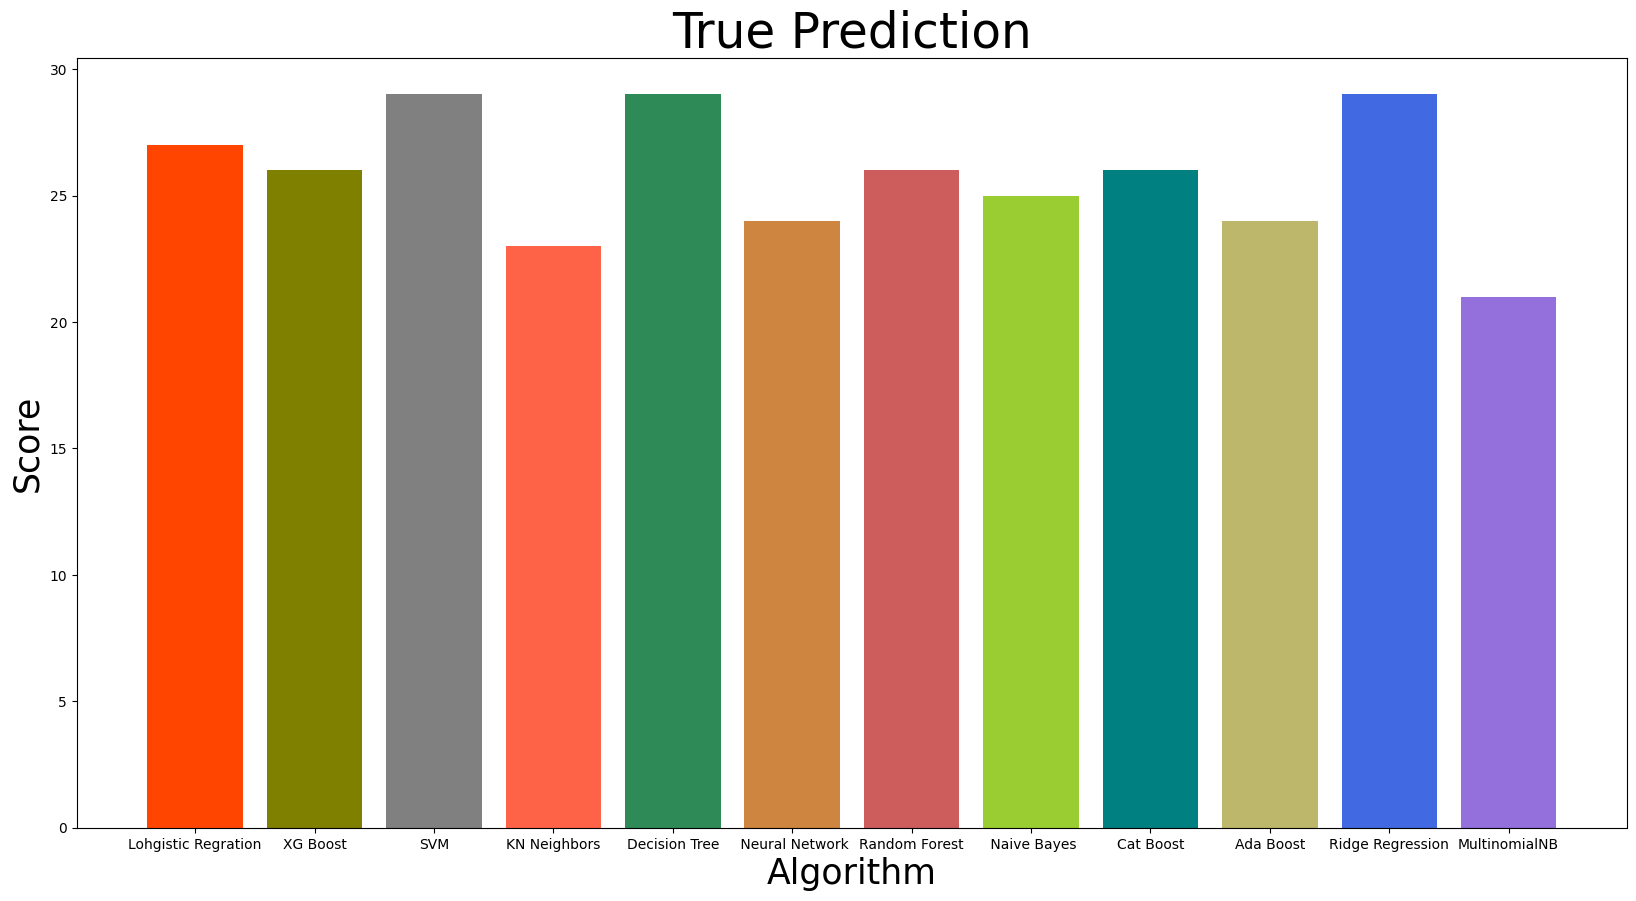

In [186]:
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest',' Naive Bayes', 'Cat Boost', 'Ada Boost', 'Ridge Regression','MultinomialNB']
values_tp = [TP_lr,TP_xgb,TP_svm,TP_knn,TP_dt,TP_nn,TP_rf,TP_nb,TP_cb,TP_ab,TP_rr,TP_mnb]
plt.figure(figsize=(68,10))
color = ["orangered","olive","gray","tomato","seagreen","peru","indianred","yellowgreen","teal","darkkhaki","royalblue","mediumpurple"]

plt.subplot(131)
plt.bar(names, values_tp, color=color)
plt.title('True Prediction', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

In [187]:
print('Best Accuracy in true prediction: ',names[values_tp.index(max(values_tp))], '\t', max(values_tp) )

Best Accuracy in true prediction:  SVM 	 29


## True Negatives

Text(0, 0.5, 'Score')

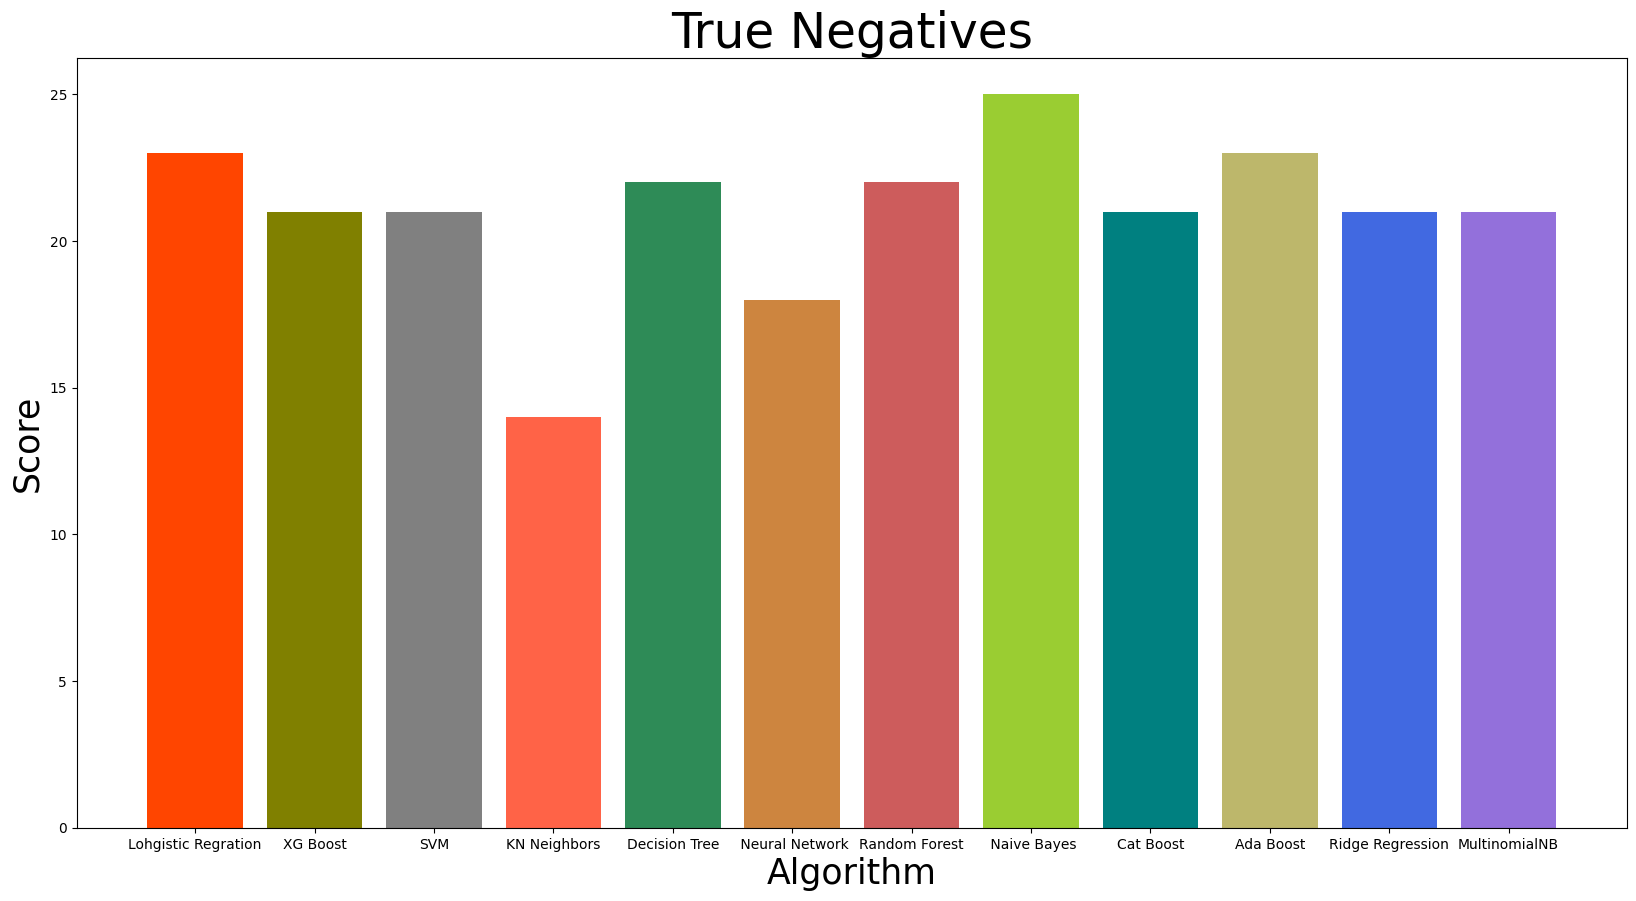

In [188]:
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest',' Naive Bayes', 'Cat Boost', 'Ada Boost','Ridge Regression', 'MultinomialNB']
values_tn = [TN_lr,TN_xgb,TN_svm,TN_knn,TN_dt,TN_nn,TN_rf,TN_nb,TN_cb,TN_ab,TN_rr,TN_mnb]
plt.figure(figsize=(68,10))
color = ["orangered","olive","gray","tomato","seagreen","peru","indianred","yellowgreen","teal","darkkhaki","royalblue","mediumpurple"]

plt.subplot(131)
plt.bar(names, values_tn, color=color)
plt.title('True Negatives', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

In [189]:
print('Best Accuracy in true negetive: ',names[values_tn.index(max(values_tn))], '\t', max(values_tn) )

Best Accuracy in true negetive:   Naive Bayes 	 25


## Training accuracy comparision

Text(0, 0.5, 'Score')

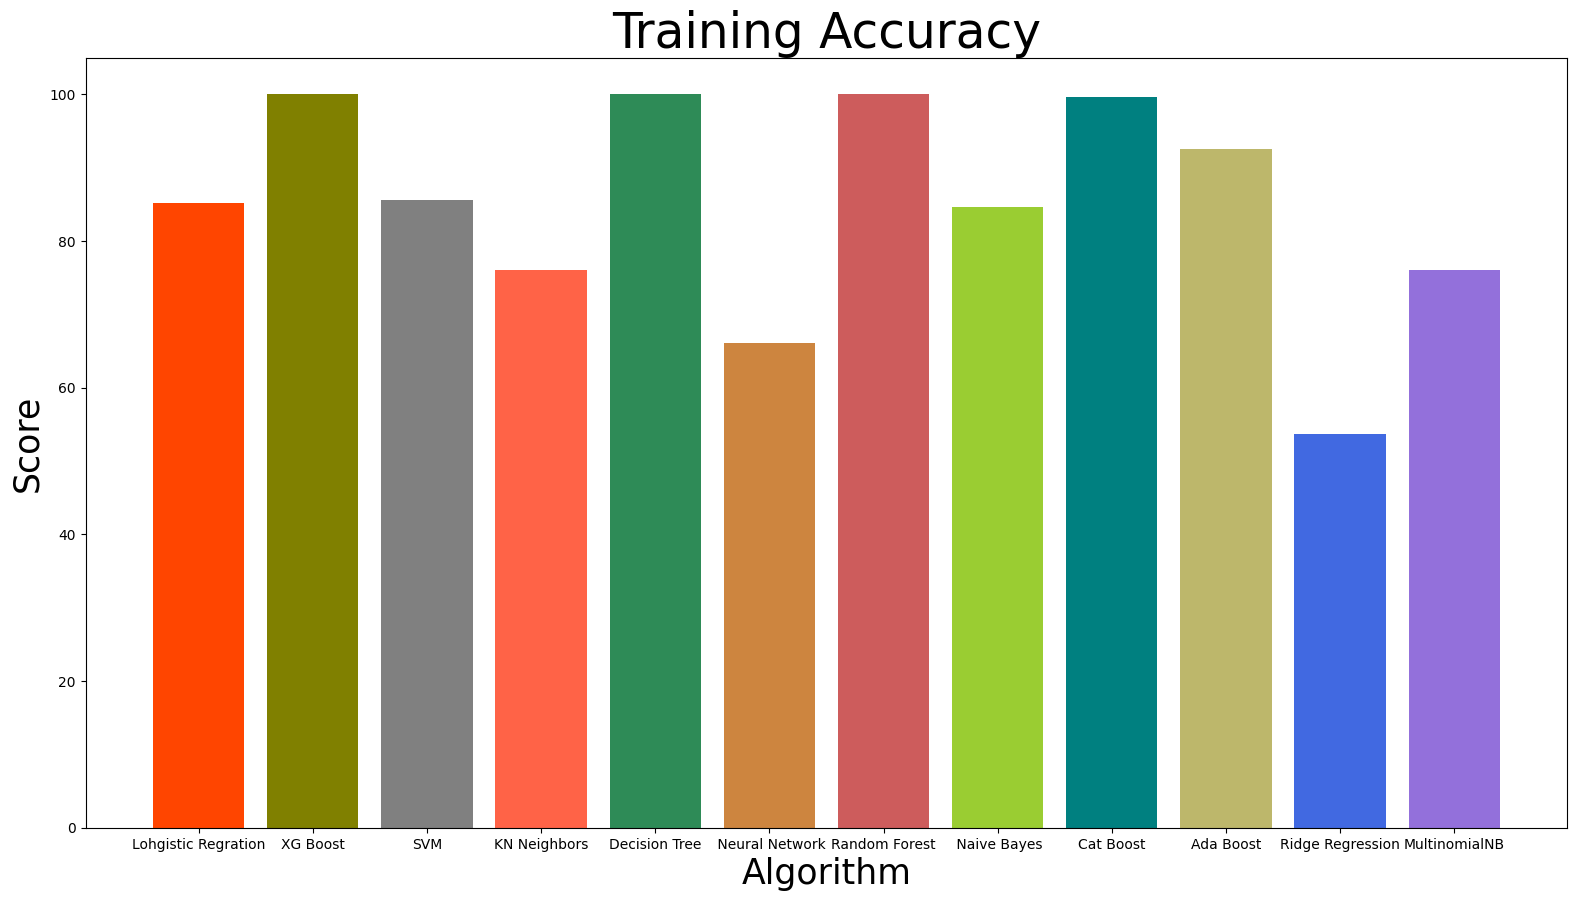

In [190]:
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest', ' Naive Bayes','Cat Boost', 'Ada Boost', 'Ridge Regression', 'MultinomialNB']
values_tac = [training_data_accuracy_logistic*100, training_data_accuracy_xgb*100, training_data_accuracy_svm*100, training_data_accuracy_knn*100, training_data_accuracy_dt*100, training_data_accuracy_nn * 100, training_data_accuracy_rf*100, training_data_accuracy_nb*100, training_data_accuracy_cb*100, training_data_accuracy_ab*100, training_data_accuracy_rr*100, training_data_accuracy_mnb*100]

plt.figure(figsize=(65,10))
color = ["orangered","olive","gray","tomato","seagreen","peru","indianred","yellowgreen","teal","darkkhaki","royalblue","mediumpurple"]

plt.subplot(131)
plt.bar(names, values_tac, color= color)
plt.title('Training Accuracy', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

In [191]:
print('Best Accuracy in train Data: ',names[values_tac.index(max(values_tac))], '\t', max(values_tac) )

Best Accuracy in train Data:  XG Boost 	 100.0


## Test Accuracy

Text(0, 0.5, 'Score')

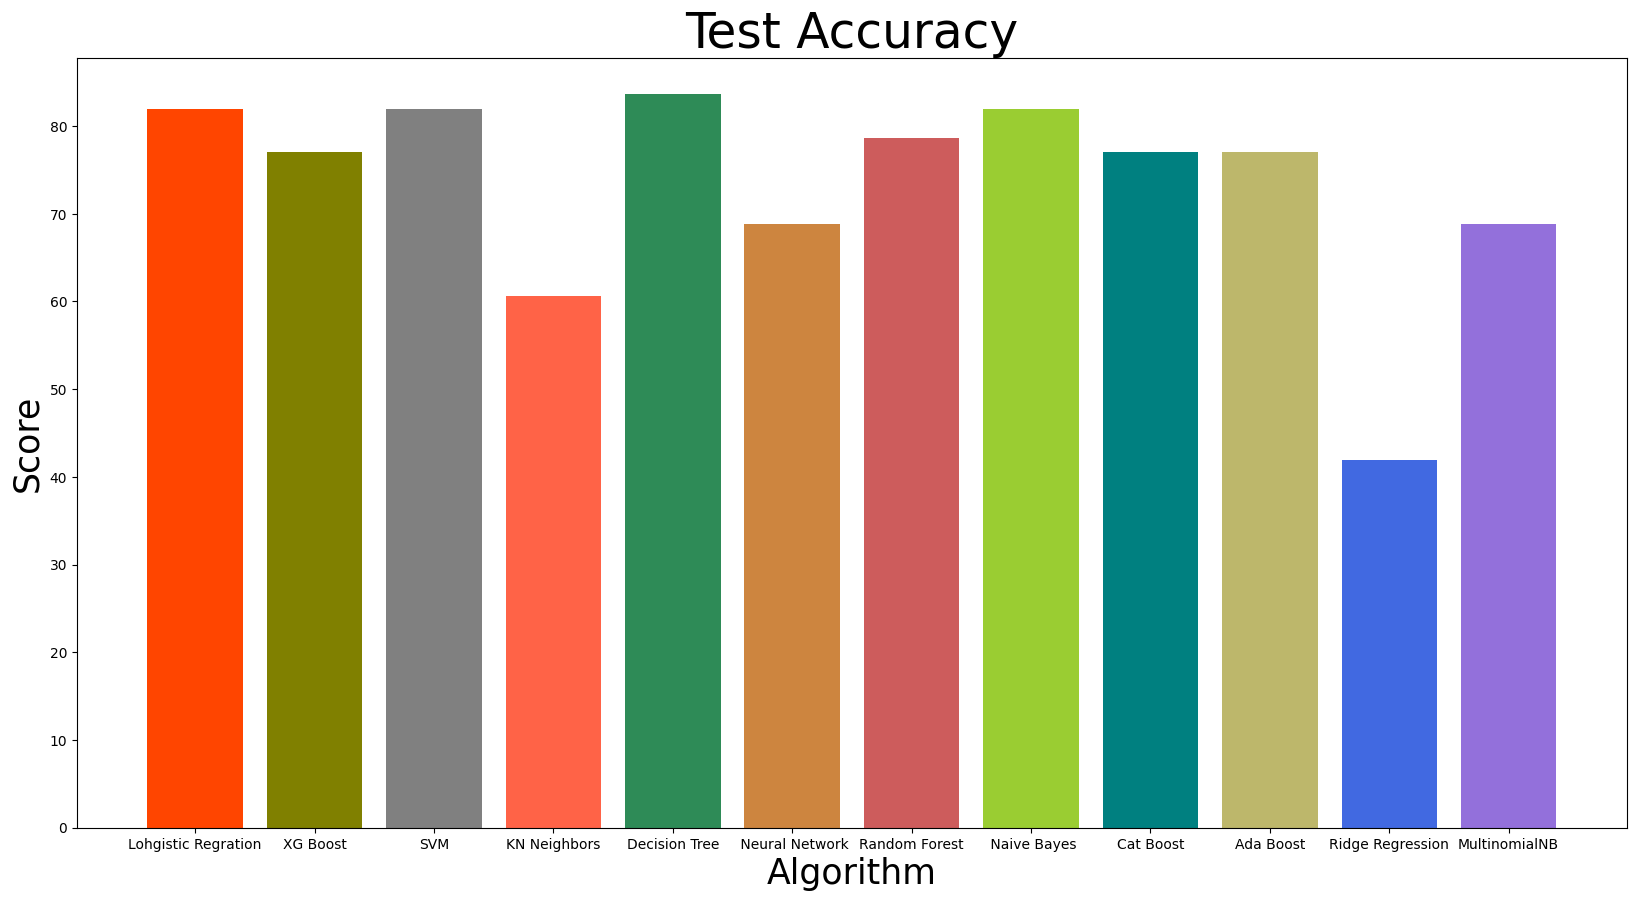

In [192]:
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest',' Naive Bayes', 'Cat Boost', 'Ada Boost','Ridge Regression', 'MultinomialNB']
values_ta = [test_data_accuracy_logistic*100, test_data_accuracy_xgb*100, test_data_accuracy_svm*100, test_data_accuracy_knn*100, test_data_accuracy_dt*100, test_data_accuracy_nn * 100, test_data_accuracy_rf*100, test_data_accuracy_nb*100,test_data_accuracy_cb*100, test_data_accuracy_ab*100, test_data_accuracy_rr*100, test_data_accuracy_mnb*100]

plt.figure(figsize=(68,10))
color = ["orangered","olive","gray","tomato","seagreen","peru","indianred","yellowgreen","teal","darkkhaki","royalblue","mediumpurple"]

plt.subplot(131)
plt.bar(names, values_ta, color=color)
plt.title('Test Accuracy', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

In [193]:
print('Best Accuracy in test Data: ',names[values_ta.index(max(values_ta))] , '\t', max(values_ta))

Best Accuracy in test Data:  Decision Tree 	 83.60655737704919


## Pricision

Text(0, 0.5, 'Score')

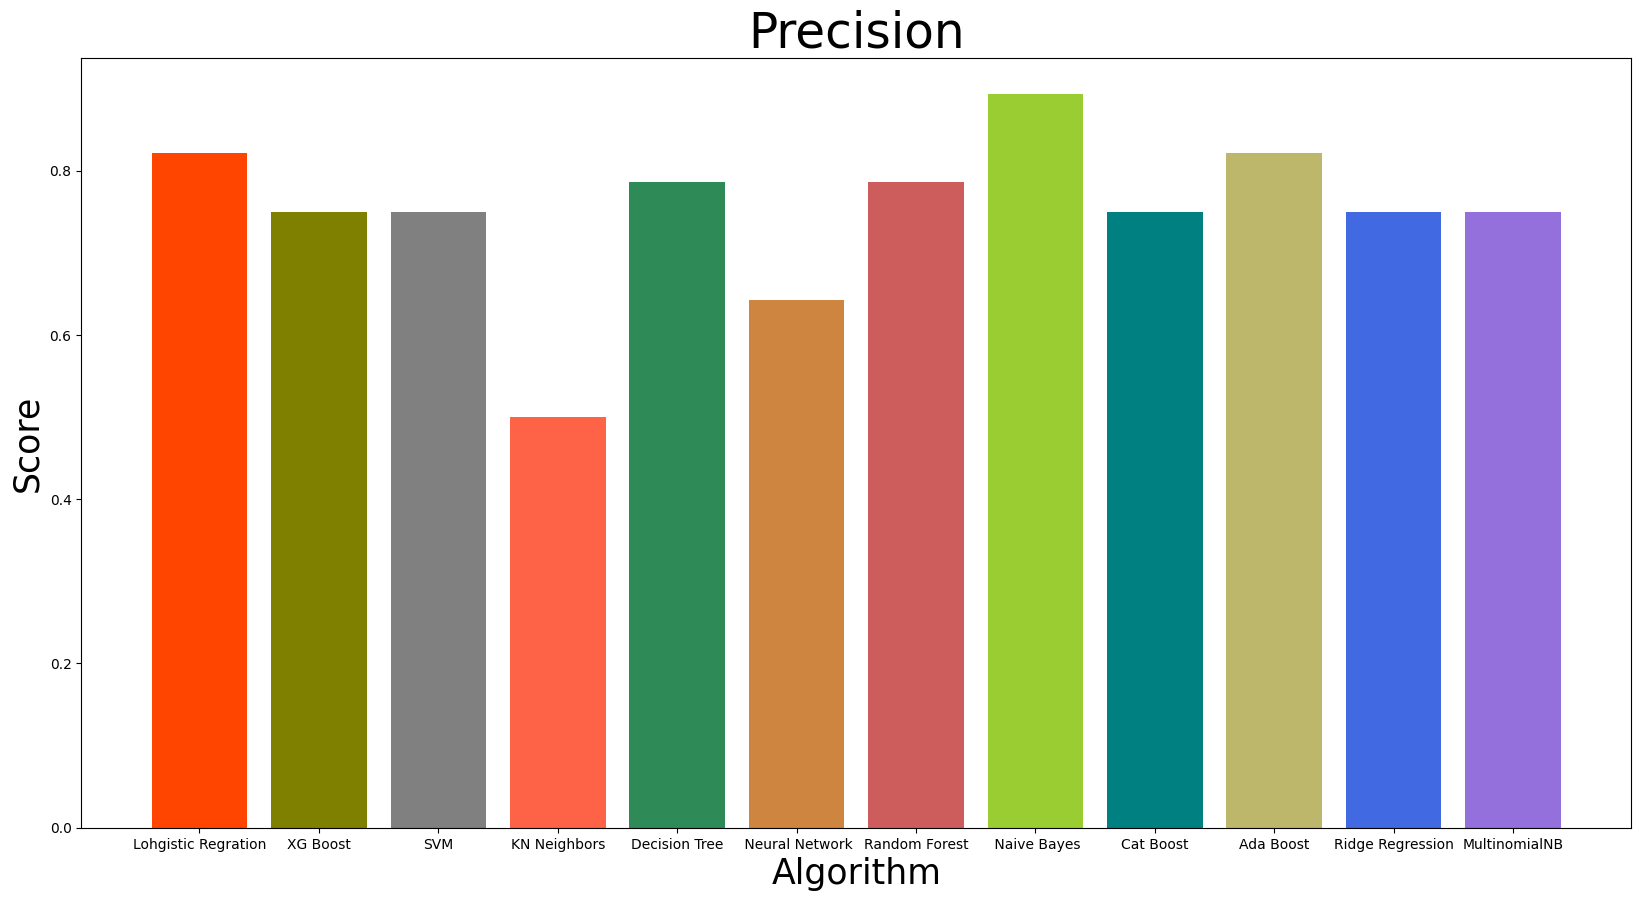

In [194]:
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest',' Naive Bayes', 'Cat Boost', 'Ada Boost','Ridge Regression', 'MultinomialNB']
values_pr = [conf_precision_lr,conf_precision_xgb,conf_precision_svm,conf_precision_knn,conf_precision_dt,conf_precision_nn,conf_precision_rf,conf_precision_nb,conf_precision_cb,conf_precision_ab,conf_precision_rr,conf_precision_mnb]
plt.figure(figsize=(68,10))
color = ["orangered","olive","gray","tomato","seagreen","peru","indianred","yellowgreen","teal","darkkhaki","royalblue","mediumpurple"]

plt.subplot(131)
plt.bar(names, values_pr, color=color)
plt.title('Precision', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

In [195]:
print('Best Precision in pricision: ',names[values_pr.index(max(values_pr))] , '\t', max(values_pr))

Best Precision in pricision:   Naive Bayes 	 0.8928571428571429


## Sensitivity

Text(0, 0.5, 'Score')

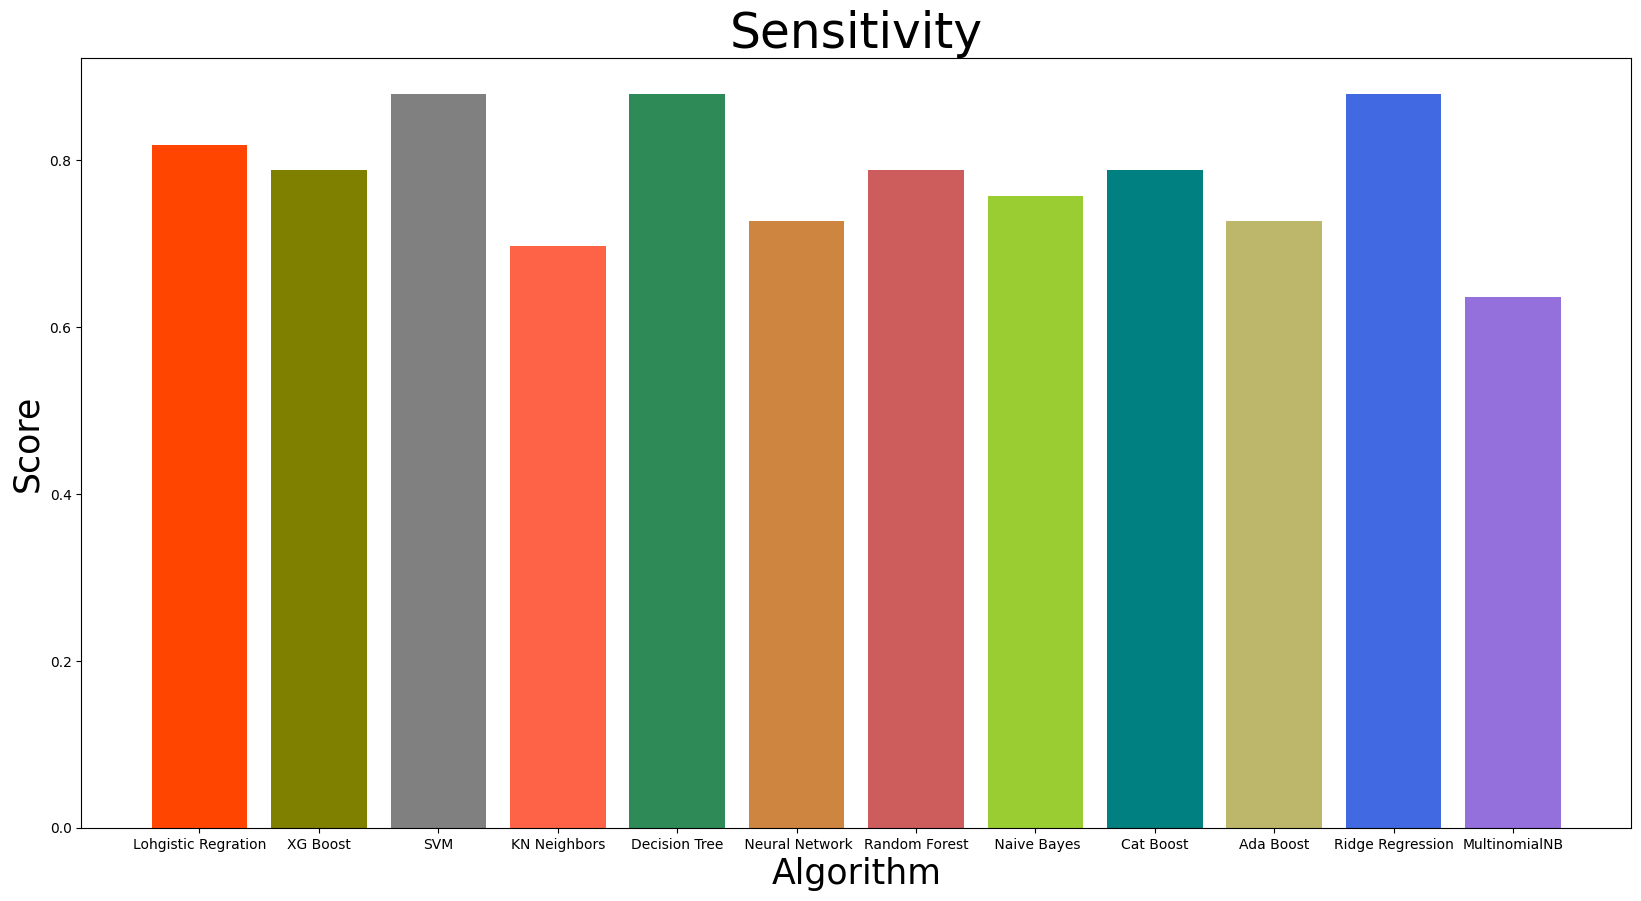

In [196]:
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest',' Naive Bayes', 'Cat Boost', 'Ada Boost','Ridge Regression', 'MultinomialNB']
values_se = [conf_sensitivity_lr,conf_sensitivity_xgb,conf_sensitivity_svm,conf_sensitivity_knn,conf_sensitivity_dt,conf_sensitivity_nn,conf_sensitivity_rf,conf_sensitivity_nb,conf_sensitivity_cb,conf_sensitivity_ab,conf_sensitivity_rr, conf_sensitivity_mnb]

plt.figure(figsize=(68,10))
color = ["orangered","olive","gray","tomato","seagreen","peru","indianred","yellowgreen","teal","darkkhaki","royalblue","mediumpurple"]

plt.subplot(131)
plt.bar(names, values_se, color=color)
plt.title('Sensitivity', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

In [197]:
print('Best Precision in sencitivity: ',names[values_se.index(max(values_se))] , '\t', max(values_se))

Best Precision in sencitivity:  SVM 	 0.8787878787878788


## Specificity

Text(0, 0.5, 'Score')

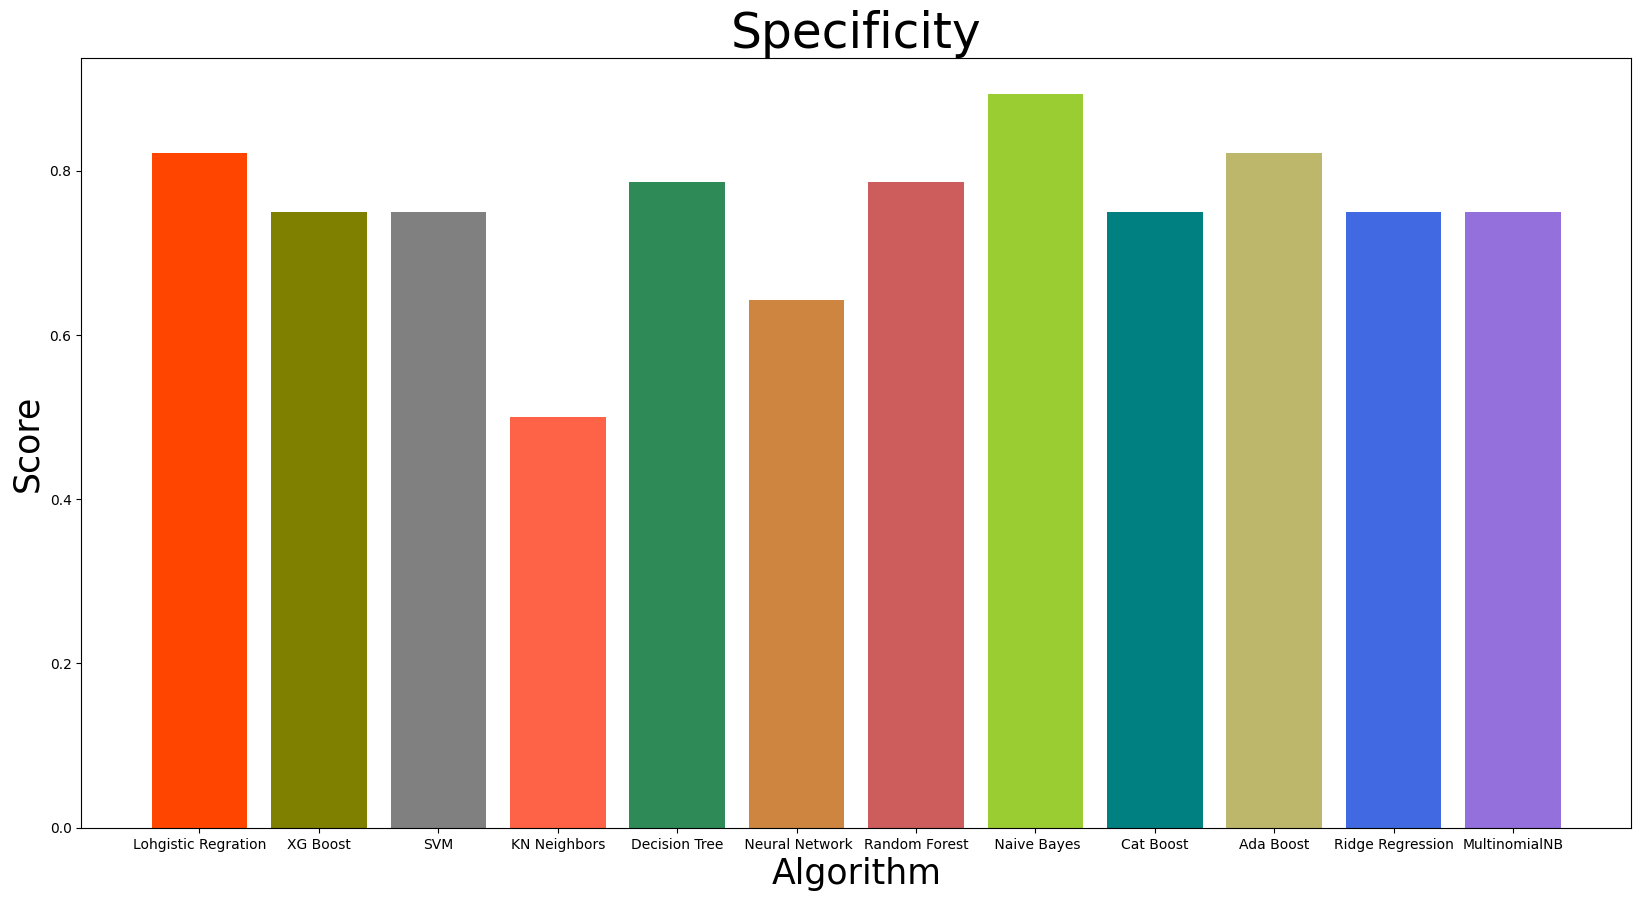

In [198]:
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest',' Naive Bayes', 'Cat Boost', 'Ada Boost', 'Ridge Regression','MultinomialNB']
values_sp = [conf_specificity_lr, conf_specificity_xgb, conf_specificity_svm, conf_specificity_knn, conf_specificity_dt, conf_specificity_nn, conf_specificity_rf, conf_specificity_nb, conf_specificity_cb, conf_specificity_ab, conf_specificity_rr, conf_specificity_mnb]

plt.figure(figsize=(68,10))
color = ["orangered","olive","gray","tomato","seagreen","peru","indianred","yellowgreen","teal","darkkhaki","royalblue","mediumpurple"]

plt.subplot(131)
plt.bar(names, values_sp, color=color)
plt.title('Specificity', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

In [199]:
print('Best Precision in specitivity: ',names[values_sp.index(max(values_sp))] , '\t', max(values_sp))

Best Precision in specitivity:   Naive Bayes 	 0.8928571428571429


## f_1 Score

Text(0, 0.5, 'Score')

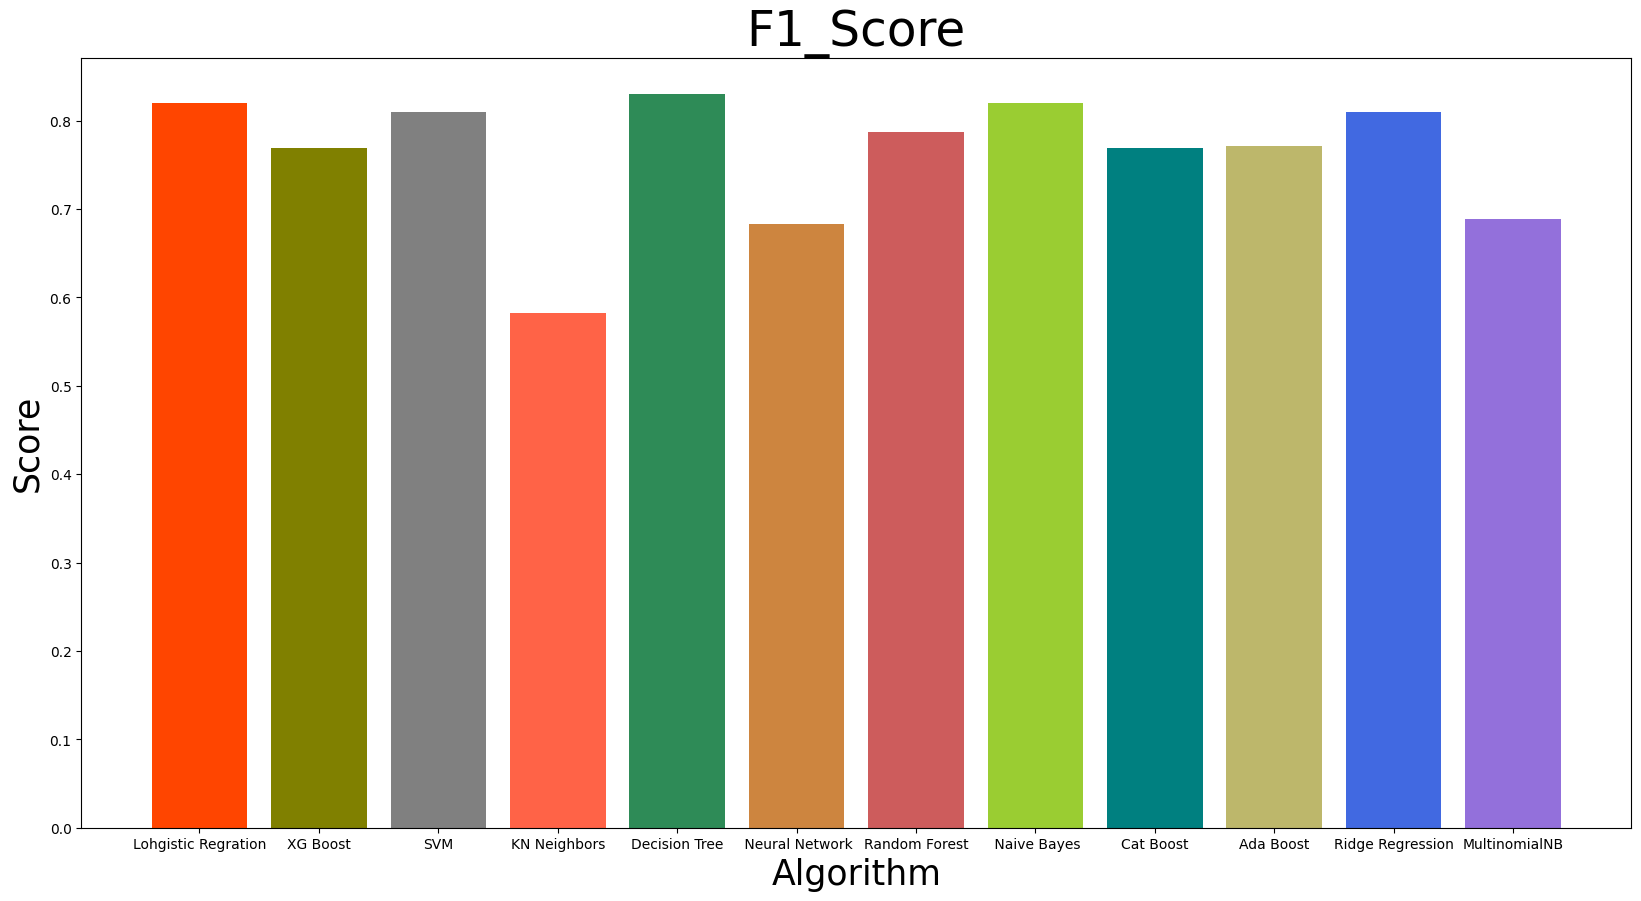

In [200]:
%matplotlib inline
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest',' Naive Bayes', 'Cat Boost', 'Ada Boost','Ridge Regression', 'MultinomialNB']
values_f1 = [conf_f1_lr,conf_f1_xgb,conf_f1_svm,conf_f1_knn,conf_f1_dt,conf_f1_nn,conf_f1_rf,conf_f1_nb,conf_f1_cb,conf_f1_ab,conf_f1_rr,conf_f1_mnb]

plt.figure(figsize=(68,10))
color = ["orangered","olive","gray","tomato","seagreen","peru","indianred","yellowgreen","teal","darkkhaki","royalblue","mediumpurple"]

plt.subplot(131)
plt.bar(names, values_f1, color=color)
plt.title('F1_Score', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

In [201]:
print('Best Precision in f1_score: ',names[values_f1.index(max(values_f1))] , '\t', max(values_f1))

Best Precision in f1_score:  Decision Tree 	 0.8296488946684005


### Time

Text(0, 0.5, 'Score')

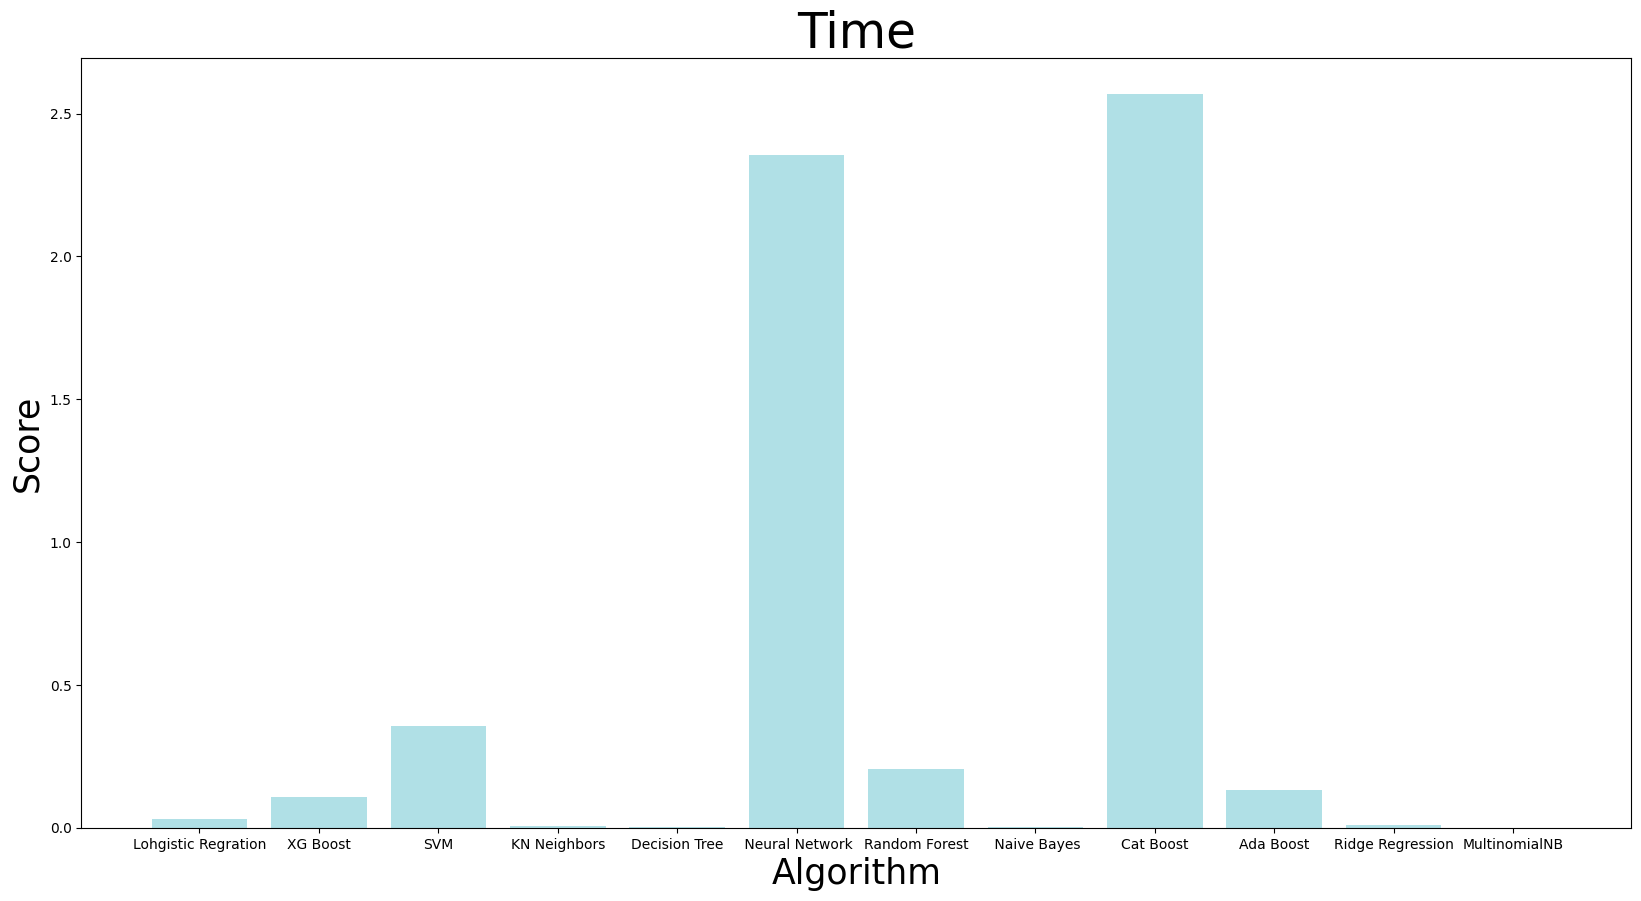

In [202]:
names = ['Lohgistic Regration', 'XG Boost', 'SVM', 'KN Neighbors', 'Decision Tree', ' Neural Network', 'Random Forest',' Naive Bayes', 'Cat Boost', 'Ada Boost','Ridge Regression', 'MultinomialNB']
values_time = [lr_time, xgb_time, svm_time, knn_time, dt_time, nn_time, rf_time, nb_time, cb_time, ab_time, rr_time, mnb_time]

plt.figure(figsize=(68,10))

plt.subplot(131)
plt.bar(names, values_time, color='powderblue')
plt.title('Time', fontsize=35)
plt.xlabel('Algorithm', fontsize= 25)
plt.ylabel('Score', fontsize = 25)

## Result

In [203]:
data= {'Name': names,
    'True Prediction': values_tp,
       'True negetive': values_tn,
       'Accuracy': values_ta,
       'Pricision': values_pr,
      'Sensitivity': values_se,
      'Specificity': values_sp,
      'F1_score': values_f1,
      'Time': values_time}
df=pd.DataFrame(data)
df

,Name,True Prediction,True negetive,Accuracy,Pricision,Sensitivity,Specificity,F1_score,Time
0,Lohgistic Regration,27,23,81.967213,0.821429,0.818182,0.821429,0.819802,0.0288
1,XG Boost,26,21,77.049180,0.750000,0.787879,0.750000,0.768473,0.1071
2,SVM,29,21,81.967213,0.750000,0.878788,0.750000,0.809302,0.3559
3,KN Neighbors,23,14,60.655738,0.500000,0.696970,0.500000,0.582278,0.0070
4,Decision Tree,29,22,83.606557,0.785714,0.878788,0.785714,0.829649,0.0042
5,Neural Network,24,18,68.852459,0.642857,0.727273,0.642857,0.682464,2.3559
6,Random Forest,26,22,78.688525,0.785714,0.787879,0.785714,0.786795,0.2046
7,Naive Bayes,25,25,81.967213,0.892857,0.757576,0.892857,0.819672,0.0035
8,Cat Boost,26,21,77.049180,0.750000,0.787879,0.750000,0.768473,2.5673
9,Ada Boost,24,23,77.049180,0.821429,0.727273,0.821429,0.771488,0.1325


In [204]:
# result convert to csv
#df.to_csv("Result.csv", index=False)


### Build a prediction model 

In [205]:
input_data = (49,1,1,130,266,0,1,171,0,0.6,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dt_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


[1]
The Person has Heart Disease


c:\Users\SAYAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [206]:
# d = {
#     'Defective Heart(0)': 165,
#     'Healthy Heart(1)': 138
# }

# df1 = pd.DataFrame([d])
# df1.to_csv('heart.csv', index=False)
# df1

###### 